In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Consolas'

In [2]:
pd.Series(list('bacd'))

0    b
1    a
2    c
3    d
dtype: object

In [3]:
pd.Series(list('abcdefg'))

0    a
1    b
2    c
3    d
4    e
5    f
6    g
dtype: object

In [16]:
lifesat = pd.read_csv('data/lifesat.csv')
gdp = 'GDP per capita (USD)'
ls = 'Life satisfaction'

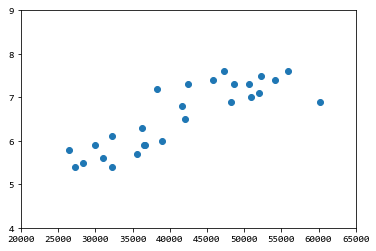

In [17]:
plt.scatter(lifesat[gdp], lifesat[ls])
plt.axis([20_000, 65_000, 4, 9])
plt.show()